In [1]:
# This example demonstrates the use of the Steane code for quantum error correction using qstack.
# The Steane code is a 7-qubit error-correcting code that can correct single-qubit errors.
# The clifford_min layer is a minimal abstraction layer for Clifford operations, providing essential gates like H, CX, and Pauli gates.
# It is designed for efficient simulation and execution of quantum programs.
import logging

# Set up logging to monitor the execution of the program.
logger = logging.getLogger("qstack")

handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)


In [2]:
# Import necessary components from qstack.
from qstack.layers.cliffords_min import *
from qstack import Program, Stack, Kernel

# Create a stack using the cliffords_min layer.
stack = Stack.create(layer)

# Define a simple quantum program to be compiled with error correction.
original = Program(
    stack=stack,
    kernels=[Kernel.allocate("q1", compute=[])],  # Allocate a single qubit.
)

# Print the original program to visualize its structure.
print(original)


@stack: cliffords-min

allocate q1:
measure


In [3]:
# Compile the program using the Steane error-correcting compiler.
from qstack.compilers.steane import SteaneCompiler

compiler = SteaneCompiler()
compiled = compiler.compile(original)

# Print the compiled program to see the error-corrected version.
print(compiled)


2025-05-08 16:53:43,464 - WARNING - Instruction y has no handler.
2025-05-08 16:53:43,467 - WARNING - Instruction cz has no handler.


@stack: cliffords-min.extended@steane@l0:cliffords-min

allocate q1.0 q1.1 q1.2 q1.3 q1.4 q1.5 q1.6:
  ---
  ---
  h q1.4
  h q1.5
  h q1.6
  cx q1.4 q1.0
  cx q1.4 q1.1
  cx q1.4 q1.3
  cx q1.5 q1.0
  cx q1.5 q1.2
  cx q1.5 q1.3
  cx q1.6 q1.1
  cx q1.6 q1.2
  cx q1.6 q1.3
measure
?? decode


In [5]:
# Set up a local quantum machine to execute the compiled program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
# Set up a local quantum machine to execute the program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
from qstack.machine import local_machine_for

machine = local_machine_for(compiled.stack)

# Perform a single-shot execution of the error-corrected program.
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(compiled)

logger.setLevel(logging.INFO)


2025-05-08 16:54:51,188 - DEBUG - Found gate y: [[0, (-0-1j)], [1j, 0]]
2025-05-08 16:54:51,191 - DEBUG - Found gate cx: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]
2025-05-08 16:54:51,193 - DEBUG - Found gate cz: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]
2025-05-08 16:54:51,194 - DEBUG - Found gate z: [[1, 0], [0, -1]]
2025-05-08 16:54:51,195 - DEBUG - Found gate x: [[0, 1], [1, 0]]


2025-05-08 16:54:51,196 - DEBUG - Found gate h: [[0.7071, 0.7071], [0.7071, -0.7071]]
2025-05-08 16:54:51,198 - DEBUG - restart: 7
2025-05-08 16:54:51,199 - DEBUG - eval: h [2]
2025-05-08 16:54:51,200 - DEBUG - eval: h [1]
2025-05-08 16:54:51,201 - DEBUG - eval: h [0]
2025-05-08 16:54:51,202 - DEBUG - eval: cx [6, 2]
2025-05-08 16:54:51,203 - DEBUG - eval: cx [5, 2]
2025-05-08 16:54:51,205 - DEBUG - eval: cx [3, 2]
2025-05-08 16:54:51,206 - DEBUG - eval: cx [6, 1]
2025-05-08 16:54:51,208 - DEBUG - eval: cx [4, 1]
2025-05-08 16:54:51,211 - DEBUG - eval: cx [3, 1]
2025-05-08 16:54:51,212 - DEBUG - eval: cx [5, 0]
2025-05-08 16:54:51,213 - DEBUG - eval: cx [4, 0]
2025-05-08 16:54:51,215 - DEBUG - eval: cx [3, 0]
2025-05-08 16:54:51,216 - DEBUG - outcome: 0
2025-05-08 16:54:51,216 - DEBUG - outcome: 1
2025-05-08 16:54:51,218 - DEBUG - outcome: 0
2025-05-08 16:54:51,219 - DEBUG - outcome: 1
2025-05-08 16:54:51,220 - DEBUG - outcome: 1
2025-05-08 16:54:51,221 - DEBUG - outcome: 0
2025-05-08 

In [6]:
# Define a more complex program to demonstrate error correction in action.
original = Program(
    stack=stack,
    kernels=[
        Kernel.allocate(
            "q1",
            "q2",
            compute=[
                H("q1"),  # Apply a Hadamard gate to the first qubit.
                CX("q1", "q2"),  # Entangle the first and second qubits.
            ],
        )
    ],
)

# Print the original program.
print(original)


@stack: cliffords-min

allocate q1 q2:
  h q1
  cx q1 q2
measure


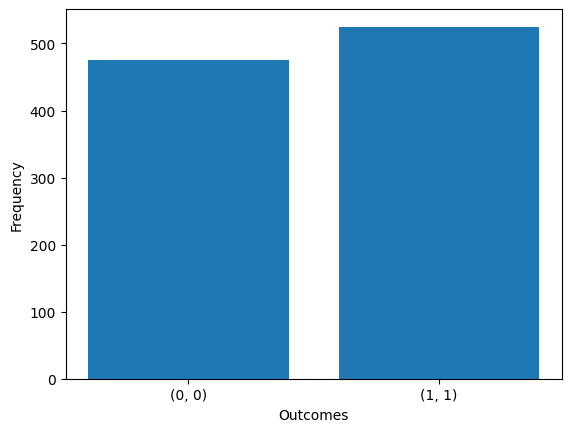

In [7]:
# Execute the original program without error correction and plot the results.
machine = local_machine_for(stack)
machine.eval(original).plot_histogram()


In [8]:
# Compile the program with the Steane error-correcting compiler.
compiled = compiler.compile(original)

# Print the compiled program.
print(compiled)


@stack: cliffords-min.extended@steane@l0:cliffords-min

allocate q1.0 q1.1 q1.2 q1.3 q1.4 q1.5 q1.6:
  allocate q2.0 q2.1 q2.2 q2.3 q2.4 q2.5 q2.6:
    ---
    ---
    h q1.4
    h q1.5
    h q1.6
    cx q1.4 q1.0
    cx q1.4 q1.1
    cx q1.4 q1.3
    cx q1.5 q1.0
    cx q1.5 q1.2
    cx q1.5 q1.3
    cx q1.6 q1.1
    cx q1.6 q1.2
    cx q1.6 q1.3
    ---
    h q2.4
    h q2.5
    h q2.6
    cx q2.4 q2.0
    cx q2.4 q2.1
    cx q2.4 q2.3
    cx q2.5 q2.0
    cx q2.5 q2.2
    cx q2.5 q2.3
    cx q2.6 q2.1
    cx q2.6 q2.2
    cx q2.6 q2.3
    allocate q1.z.0 q1.z.1 q1.z.2:
      cx q1.0 q1.z.0
      cx q1.1 q1.z.0
      cx q1.3 q1.z.0
      cx q1.4 q1.z.0
      cx q1.0 q1.z.1
      cx q1.2 q1.z.1
      cx q1.3 q1.z.1
      cx q1.5 q1.z.1
      cx q1.1 q1.z.2
      cx q1.2 q1.z.2
      cx q1.3 q1.z.2
      cx q1.6 q1.z.2
    measure
    ?? correct_z(qubit=q1)
    allocate q1.x.0 q1.x.1 q1.x.2:
      h q1.x.0
      h q1.x.1
      h q1.x.2
      cx q1.x.0 q1.0
      cx q1.x.0 q1.1
      cx

2025-05-08 16:55:29,497 - DEBUG - Found gate y: [[0, (-0-1j)], [1j, 0]]
2025-05-08 16:55:29,501 - DEBUG - Found gate cx: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]
2025-05-08 16:55:29,503 - DEBUG - Found gate cz: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]
2025-05-08 16:55:29,505 - DEBUG - Found gate z: [[1, 0], [0, -1]]
2025-05-08 16:55:29,507 - DEBUG - Found gate x: [[0, 1], [1, 0]]
2025-05-08 16:55:29,509 - DEBUG - Found gate h: [[0.7071, 0.7071], [0.7071, -0.7071]]
2025-05-08 16:55:29,512 - DEBUG - restart: 17
2025-05-08 16:55:29,517 - DEBUG - eval: h [12]
2025-05-08 16:55:29,521 - DEBUG - eval: h [11]
2025-05-08 16:55:29,526 - DEBUG - eval: h [10]
2025-05-08 16:55:29,530 - DEBUG - eval: cx [16, 12]
2025-05-08 16:55:29,534 - DEBUG - eval: cx [15, 12]
2025-05-08 16:55:29,539 - DEBUG - eval: cx [13, 12]
2025-05-08 16:55:29,543 - DEBUG - eval: cx [16, 11]
2025-05-08 16:55:29,548 - DEBUG - eval: cx [14, 11]
2025-05-08 16:55:29,552 - DEBUG - eval: cx [13, 11]

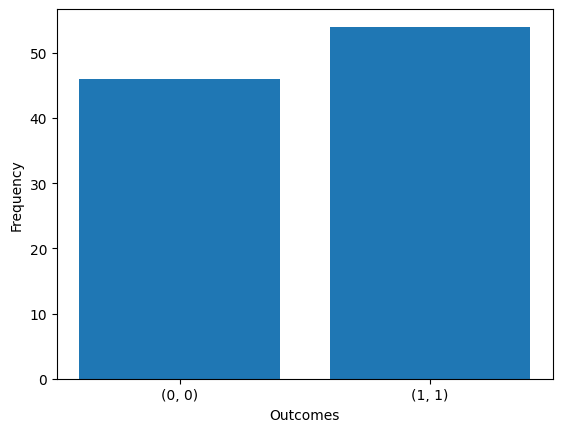

In [9]:
# Execute the error-corrected program and plot the results.
logger.setLevel(logging.DEBUG)

machine = local_machine_for(compiled.stack)
machine.single_shot(compiled)

logger.setLevel(logging.INFO)
machine.eval(compiled, shots=100).plot_histogram()


In [10]:
# Demonstrate the state preparation routine for the Steane code.
from qstack.ast import QubitId

# Define the 7 qubits used in the Steane code.
q = [QubitId(i) for i in range(7)]

# Define the instructions for preparing the Steane code state.
instructions = [
    H(q[4]),  # Apply a Hadamard gate to the 5th qubit.
    H(q[5]),  # Apply a Hadamard gate to the 6th qubit.
    H(q[6]),  # Apply a Hadamard gate to the 7th qubit.
    CX(q[4], q[0]),  # Entangle the 5th qubit with the 1st qubit.
    CX(q[4], q[1]),  # Entangle the 5th qubit with the 2nd qubit.
    CX(q[4], q[3]),  # Entangle the 5th qubit with the 4th qubit.
    CX(q[5], q[0]),  # Entangle the 6th qubit with the 1st qubit.
    CX(q[5], q[2]),  # Entangle the 6th qubit with the 3rd qubit.
    CX(q[5], q[3]),  # Entangle the 6th qubit with the 4th qubit.
    CX(q[6], q[1]),  # Entangle the 7th qubit with the 2nd qubit.
    CX(q[6], q[2]),  # Entangle the 7th qubit with the 3rd qubit.
    CX(q[6], q[3]),  # Entangle the 7th qubit with the 4th qubit.
]

# Create a program for the state preparation routine.
encoder = Program(stack=stack, kernels=[Kernel(targets=q, instructions=instructions)])

# Execute the state preparation routine and print the resulting histogram.
machine = local_machine_for(stack)
for k, v in machine.eval(encoder).get_histogram().items():
    print(k, v)


(0, 0, 0, 0, 0, 0, 0) 130
(1, 0, 1, 1, 0, 1, 0) 124
(1, 1, 0, 0, 0, 1, 1) 121
(1, 0, 1, 0, 1, 0, 1) 133
(0, 1, 1, 0, 1, 1, 0) 125
(0, 0, 0, 1, 1, 1, 1) 132
(0, 1, 1, 1, 0, 0, 1) 93
(1, 1, 0, 1, 1, 0, 0) 142
